<a href="https://colab.research.google.com/github/Ron-Rocks/AndroidIC-Dogs-and-Cats-/blob/master/AndroidCustomModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

from tensorflow.keras.models import Model,load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,Input
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
import pathlib
from google.colab import drive
from keras.callbacks import ModelCheckpoint
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zipPath = tf.keras.utils.get_file('cats_and_dogs.zip', origin=url, extract=True)

PATH = os.path.join(os.path.dirname(zipPath), 'cats_and_dogs_filtered')

trainDir = os.path.join(PATH,"train")
valDir= os.path.join(PATH,"validation")

trainCatsDir = os.path.join(trainDir,"cats")
trainDogsDir = os.path.join(trainDir,"dogs")
valCatsDir = os.path.join(valDir,"cats")
valDogsDir = os.path.join(valDir,"dogs")

totalTrainNum = 2000
totalValNum = 1000

batchSize = 64
imgSize = 300


trainImgGenerator = ImageDataGenerator(rescale=1./255)
valImgGenerator = ImageDataGenerator(rescale=1./255)

trainDataGen = trainImgGenerator.flow_from_directory(batch_size=batchSize,directory=trainDir,shuffle=True, target_size=(imgSize, imgSize),class_mode='binary')
valDataGen = valImgGenerator.flow_from_directory(batch_size=batchSize,directory=valDir, target_size=(imgSize, imgSize),class_mode='binary')




Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
modelCheckpoint = ModelCheckpoint(filepath="/content/drive/My Drive/models/model.{epoch:02d}-{val_loss:.2f}.hdf5",save_best_only=True)

In [0]:
inputs = Input(shape = (300,300,3))
x = Conv2D(16,3,activation="relu",padding="same")(inputs)
x = MaxPooling2D(2)(x)
x = Conv2D(32,3,activation="relu",padding="same")(x)
x = MaxPooling2D(2)(x)
x = Dropout(0.2)(x)
x = Conv2D(64,3,activation="relu",padding="same")(x)
x = MaxPooling2D(2)(x)
x = Dropout(0.2)(x)
x = Conv2D(32,3,activation="relu",padding = "same")(x)
x = Flatten()(x)
x = Dense(128,activation = "relu")(x)
outputs = Dense(1,activation = "sigmoid")(x)

model = Model(inputs,outputs)



model.compile(loss = "binary_crossentropy",optimizer="adam",metrics=["accuracy"])

print("fitting Bro !!!! Have Patience")
model.fit_generator(trainDataGen,steps_per_epoch=2000//batchSize,validation_data=valDataGen,validation_steps=1000//batchSize,callbacks=[modelCheckpoint],verbose=1,epochs=20)




fitting Bro !!!! Have Patience
Epoch 1/30
31/31 [==============================] - 13s 435ms/step - loss: 0.8288 - accuracy: 0.5072 - val_loss: 0.6887 - val_accuracy: 0.4948
Epoch 2/30
31/31 [==============================] - 12s 400ms/step - loss: 0.6839 - accuracy: 0.5320 - val_loss: 0.6533 - val_accuracy: 0.5865
Epoch 3/30
31/31 [==============================] - 12s 395ms/step - loss: 0.6500 - accuracy: 0.6012 - val_loss: 0.6583 - val_accuracy: 0.5958
Epoch 4/30
31/31 [==============================] - 12s 393ms/step - loss: 0.6416 - accuracy: 0.6152 - val_loss: 0.6378 - val_accuracy: 0.6146
Epoch 5/30
31/31 [==============================] - 12s 397ms/step - loss: 0.6388 - accuracy: 0.5981 - val_loss: 0.6495 - val_accuracy: 0.6219
Epoch 6/30
31/31 [==============================] - 12s 398ms/step - loss: 0.6140 - accuracy: 0.6214 - val_loss: 0.6249 - val_accuracy: 0.6333
Epoch 7/30
31/31 [==============================] - 12s 401ms/step - loss: 0.5724 - accuracy: 0.6896 - val_loss

In [0]:
newModel = load_model("/content/drive/My Drive/models/model.08-0.58.hdf5")
converter = tf.lite.TFLiteConverter.from_keras_model(newModel)

TFliteModel = converter.convert()
open("/content/drive/My Drive/models/model.tflite", "wb").write(TFliteModel)

22602116

[[0.48887673]
 [0.12090656]
 [0.08391687]
 [0.8994303 ]
 [0.5923518 ]]


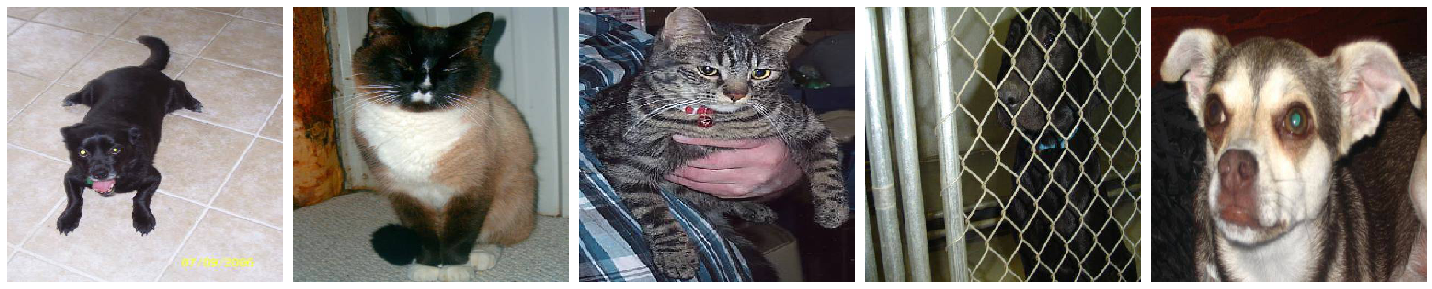

In [0]:
sample_training_images, _ = next(trainDataGen)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

prediction = newModel.predict(sample_training_images)
print(prediction[:5])
plotImages(sample_training_images[:5])
